In [3]:
import fastf1
import os
from fastf1 import get_session #function used to load data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
year = 2023
gp_name = "Silverstone"
session_type = "Q"  

# Ensure cache directory exists
cache_path = os.path.join('..', 'data', 'raw')  # relative to project root
os.makedirs(cache_path, exist_ok=True)

# Enable cache
fastf1.Cache.enable_cache(cache_path)

session = fastf1.get_session(year, gp_name, session_type)
session.load()  # loads/saves the session dat in the cache directory

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


In [13]:
print(session.laps.columns)

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


In [15]:
weather = session.weather_data
print(weather.head())

                    Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0 0 days 00:00:07.478000     20.9      79.0     999.7      True       22.2   
1 0 days 00:01:07.477000     20.9      79.0     999.7      True       22.3   
2 0 days 00:02:07.492000     21.0      78.0     999.7      True       22.4   
3 0 days 00:03:07.491000     21.0      79.0     999.5      True       22.4   
4 0 days 00:04:07.491000     21.0      78.0     999.5      True       22.5   

   WindDirection  WindSpeed  
0            224        2.7  
1            222        2.7  
2            222        3.0  
3            223        2.5  
4            206        2.5  


In [3]:
columns_to_keep = [
    'Driver', 'Team', 'Compound', 'LapNumber', 'Stint',
    'TyreLife', 'FreshTyre', 'LapTime', 'TrackStatus'
]

# Drop rows without valid LapTime
laps = session.laps.copy()
laps = laps[laps['LapTime'].notnull()]

# Filter only the desired columns|
clean_laps = laps[columns_to_keep].copy()

# Display a preview
print("\nCleaned lap data (first 5 rows):")
print(clean_laps.head())



Cleaned lap data (first 5 rows):
  Driver             Team Compound  LapNumber  Stint  TyreLife  FreshTyre  \
1    VER  Red Bull Racing     SOFT        2.0    1.0       2.0       True   
2    VER  Red Bull Racing     SOFT        3.0    1.0       3.0       True   
4    VER  Red Bull Racing     SOFT        5.0    1.0       5.0       True   
5    VER  Red Bull Racing     SOFT        6.0    1.0       6.0       True   
6    VER  Red Bull Racing     SOFT        7.0    1.0       7.0       True   

                 LapTime TrackStatus  
1 0 days 00:01:33.535000          12  
2 0 days 00:01:32.145000           1  
4 0 days 00:01:30.719000           1  
5 0 days 00:02:29.043000           1  
6 0 days 00:01:39.699000          12  


In [9]:
print(df.column())

AttributeError: 'Session' object has no attribute 'column'

In [4]:
clean_laps.info()
clean_laps.describe(include='all')


<class 'fastf1.core.Laps'>
Index: 271 entries, 1 to 384
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Driver       271 non-null    object         
 1   Team         271 non-null    object         
 2   Compound     271 non-null    object         
 3   LapNumber    271 non-null    float64        
 4   Stint        271 non-null    float64        
 5   TyreLife     271 non-null    float64        
 6   FreshTyre    271 non-null    bool           
 7   LapTime      271 non-null    timedelta64[ns]
 8   TrackStatus  271 non-null    object         
dtypes: bool(1), float64(3), object(4), timedelta64[ns](1)
memory usage: 19.3+ KB


,Driver,Team,Compound,LapNumber,Stint,TyreLife,FreshTyre,LapTime,TrackStatus
count,271,271,271,271.000000,271.000000,271.000000,271,271,271
unique,20,10,1,NaN,NaN,NaN,2,NaN,3
top,PIA,Ferrari,SOFT,NaN,NaN,NaN,True,NaN,1
freq,19,37,271,NaN,NaN,NaN,231,NaN,231
mean,NaN,NaN,NaN,11.188192,3.025830,3.723247,NaN,0 days 00:01:43.689760147,NaN
std,NaN,NaN,NaN,6.840891,1.842723,1.770377,NaN,0 days 00:00:16.310325335,NaN
min,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN,0 days 00:01:26.720000,NaN
25%,NaN,NaN,NaN,5.000000,1.000000,2.000000,NaN,0 days 00:01:30.025000,NaN
50%,NaN,NaN,NaN,11.000000,3.000000,3.000000,NaN,0 days 00:01:36.411000,NaN
75%,NaN,NaN,NaN,17.000000,4.000000,5.000000,NaN,0 days 00:01:55.662000,NaN


In [5]:
# Define export folder path relative to your notebook location
export_folder = os.path.join('processed') 


In [6]:
# Create folder if it doesn't exist
os.makedirs(export_folder, exist_ok=True)


In [7]:
# Define the full file path
export_path = os.path.join(export_folder, 'clean_data_silverstone(25,Q).csv')


In [8]:
clean_laps.to_csv(export_path, index=False)
print(f"✅ Data exported successfully to: {os.path.abspath(export_path)}")

✅ Data exported successfully to: c:\Users\Salon\OneDrive\Documents\cplus\python\F1model\processed\clean_data_silverstone(25,Q).csv


In [9]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
clean_laps['LapTimeSeconds'] = clean_laps['LapTime'].dt.total_seconds()



In [11]:
clean_laps = clean_laps[clean_laps['LapTimeSeconds'] < 200]


<Axes: xlabel='TyreLife', ylabel='LapTime'>

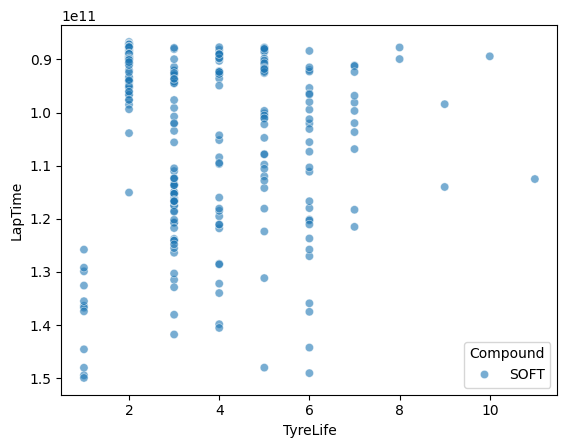

In [12]:
sns.scatterplot(data=clean_laps, x='TyreLife', y='LapTime', hue='Compound', alpha=0.6)

In [13]:
# Load cleaned Silverstone session
df = pd.read_csv('processed\clean_data_silverstone(25,Q).csv')

# Convert LapTime to seconds (assumes it's parsed as string)
df['LapTime'] = pd.to_timedelta(df['LapTime'])
df['LapTimeSeconds'] = df['LapTime'].dt.total_seconds()

# Optional: preview
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Salon\AppData\Local\Temp\ipykernel_14460\575113950.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('processed\clean_data_silverstone(25,Q).csv')


,Driver,Team,Compound,LapNumber,Stint,TyreLife,FreshTyre,LapTime,TrackStatus,LapTimeSeconds
0,VER,Red Bull Racing,SOFT,2.0,1.0,2.0,True,0 days 00:01:33.535000,12,93.535
1,VER,Red Bull Racing,SOFT,3.0,1.0,3.0,True,0 days 00:01:32.145000,1,92.145
2,VER,Red Bull Racing,SOFT,5.0,1.0,5.0,True,0 days 00:01:30.719000,1,90.719
3,VER,Red Bull Racing,SOFT,6.0,1.0,6.0,True,0 days 00:02:29.043000,1,149.043
4,VER,Red Bull Racing,SOFT,7.0,1.0,7.0,True,0 days 00:01:39.699000,12,99.699


In [14]:
# One-hot encode compound
df_encoded = pd.get_dummies(df, columns=['Compound'], drop_first=True)

# Select features
feature_cols = ['TyreLife', 'Stint', 'FreshTyre'] + [col for col in df_encoded.columns if col.startswith('Compound_')]

X = df_encoded[feature_cols]
y = df_encoded['LapTimeSeconds']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} seconds")
print(f"R²: {r2:.3f}")


MAE: 8.721 seconds
R²: 0.170


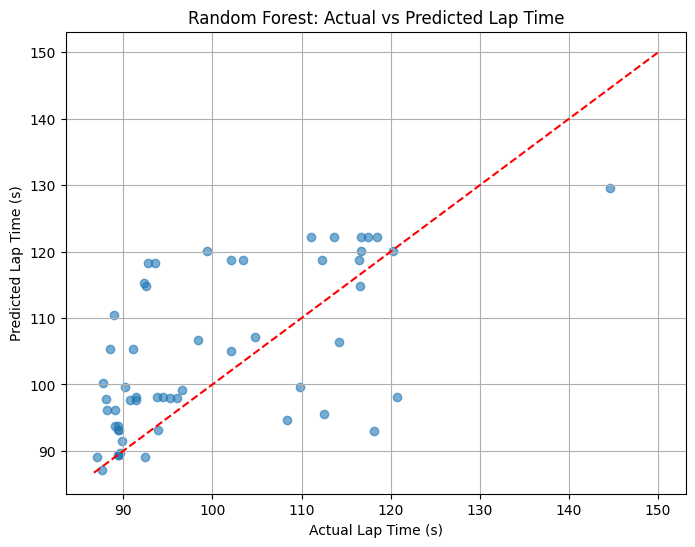

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Lap Time (s)")
plt.ylabel("Predicted Lap Time (s)")
plt.title("Random Forest: Actual vs Predicted Lap Time")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()


In [19]:
results = pd.DataFrame({
    'ActualLapTime': y_test.values,
    'PredictedLapTime': y_pred
})

# Optional: calculate absolute error
results['Error'] = abs(results['ActualLapTime'] - results['PredictedLapTime'])

# Sort by actual lap time (optional)
results = results.sort_values(by='ActualLapTime').reset_index(drop=True)

# Display first 10 rows
print(results.head(10))


   ActualLapTime  PredictedLapTime      Error
0         87.084         89.119457   2.035457
1         87.659         87.172315   0.486685
2         87.760        100.203809  12.443809
3         88.067         97.806086   9.739086
4         88.184         96.160700   7.976700
5         88.567        105.401622  16.834622
6         88.935        110.394048  21.459048
7         89.031         96.160700   7.129700
8         89.052         93.708296   4.656296
9         89.396         93.708296   4.312296


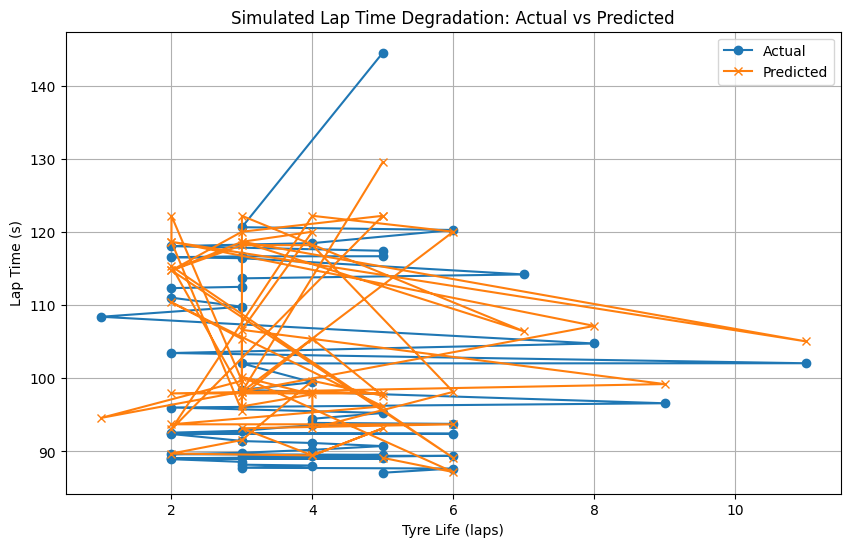

In [20]:
# Append TyreLife to results
results['TyreLife'] = X_test['TyreLife'].values
results['Compound'] = df_encoded.loc[X_test.index, 'Compound_Soft'] if 'Compound_Soft' in df_encoded else 'Unknown'

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results['TyreLife'], results['ActualLapTime'], label='Actual', marker='o')
plt.plot(results['TyreLife'], results['PredictedLapTime'], label='Predicted', marker='x')
plt.xlabel('Tyre Life (laps)')
plt.ylabel('Lap Time (s)')
plt.title('Simulated Lap Time Degradation: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
driver_mask = df['Driver'] == 'VER'
ver_df = df_encoded[driver_mask]

# Repeat the same X/y preprocessing → predict → plot just for VER


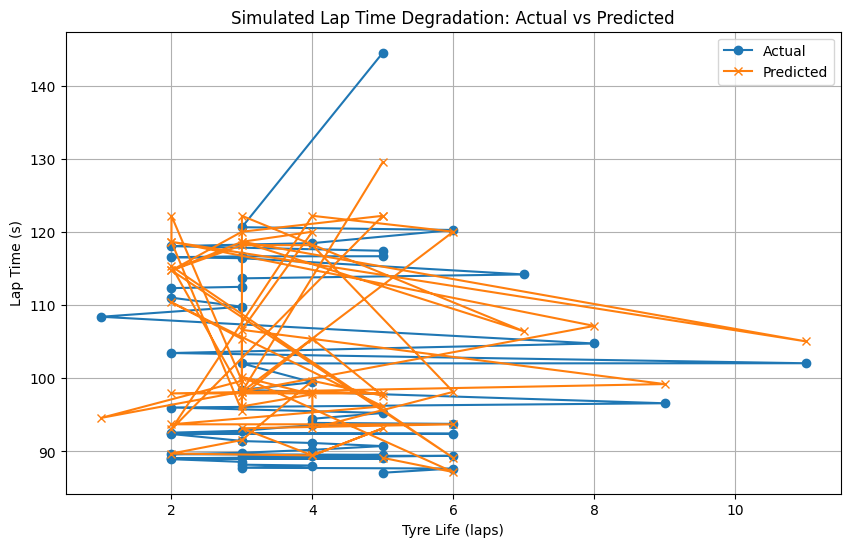

In [22]:

plt.figure(figsize=(10, 6))
plt.plot(results['TyreLife'], results['ActualLapTime'], label='Actual', marker='o')
plt.plot(results['TyreLife'], results['PredictedLapTime'], label='Predicted', marker='x')
plt.xlabel('Tyre Life (laps)')
plt.ylabel('Lap Time (s)')
plt.title('Simulated Lap Time Degradation: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(session.event)

RoundNumber                                                10
Country                                         Great Britain
Location                                          Silverstone
OfficialEventName    FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023
EventDate                                 2023-07-09 00:00:00
EventName                                  British Grand Prix
EventFormat                                      conventional
Session1                                           Practice 1
Session1Date                        2023-07-07 12:30:00+01:00
Session1DateUtc                           2023-07-07 11:30:00
Session2                                           Practice 2
Session2Date                        2023-07-07 16:00:00+01:00
Session2DateUtc                           2023-07-07 15:00:00
Session3                                           Practice 3
Session3Date                        2023-07-08 11:30:00+01:00
Session3DateUtc                           2023-07-08 10:30:00
Session4

NameError: name 'session' is not defined